In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from keras.models import load_model
model=load_model('stox.h5')

In [85]:
import yfinance as yf

symbol=input('Enter stock symbol (eg:TCS.NS): ')
ticker=yf.Ticker(symbol)

data=ticker.history(period='5d',interval='2m')
data.tail(3)

Enter stock symbol (eg:TCS.NS): COALINDIA.NS


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-04-28 15:25:00+05:30,128.550003,128.600006,128.500000,128.550003,67886,0,0
2021-04-28 15:27:00+05:30,128.500000,128.600006,128.399994,128.600006,34208,0,0
2021-04-28 15:29:00+05:30,128.449997,128.649994,128.449997,128.500000,9298,0,0


In [86]:
close=data['Close'].to_numpy()
close.shape

(940,)

In [87]:
# removing nan values
close=[c for c in close if not np.isnan(c)] 

# scaling data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close=scaler.fit_transform(np.array(close).reshape(-1, 1))

# seq_data=generate_seq_data(close,60)

# #separating X and Y
# X=seq_data[:,:-1]
# Y=seq_data[:,-1]

In [88]:
steps=200
close=close[-200:]
for i in range(0,steps):
    seq=close[-60:]
    seq=seq.reshape(1,60,1)
    pred=model.predict(seq)
    close=np.append(close,pred)
    
    print(f'step: {i} prediction: {pred}')

step: 0 prediction: [[0.82837677]]
step: 1 prediction: [[0.8288371]]
step: 2 prediction: [[0.8292432]]
step: 3 prediction: [[0.8294584]]
step: 4 prediction: [[0.8294802]]
step: 5 prediction: [[0.8293488]]
step: 6 prediction: [[0.8291252]]
step: 7 prediction: [[0.8288679]]
step: 8 prediction: [[0.8286125]]
step: 9 prediction: [[0.82837546]]
step: 10 prediction: [[0.8281583]]
step: 11 prediction: [[0.82795525]]
step: 12 prediction: [[0.8277601]]
step: 13 prediction: [[0.827567]]
step: 14 prediction: [[0.8273719]]
step: 15 prediction: [[0.8271735]]
step: 16 prediction: [[0.8269715]]
step: 17 prediction: [[0.826766]]
step: 18 prediction: [[0.826558]]
step: 19 prediction: [[0.8263475]]
step: 20 prediction: [[0.8261354]]
step: 21 prediction: [[0.82592237]]
step: 22 prediction: [[0.8257082]]
step: 23 prediction: [[0.8254937]]
step: 24 prediction: [[0.82527924]]
step: 25 prediction: [[0.8250643]]
step: 26 prediction: [[0.82484937]]
step: 27 prediction: [[0.82463473]]
step: 28 prediction: [[0.8

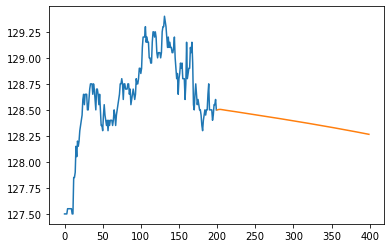

In [89]:
old=scaler.inverse_transform(close[:-steps].reshape(-1,1))
old_x=np.arange(0,len(old))

pred=scaler.inverse_transform(close[-steps:].reshape(-1,1))
pred_x=np.arange(len(old),len(close))
                 
plt.plot(old_x,old.reshape(-1,1))
plt.plot(pred_x,pred)
plt.show()